In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [2]:
torch.manual_seed(123)

In [3]:
a = 3
b = 2
x = torch.linspace(0, 5, 100).view(100, 1)

In [4]:
eps = torch.randn(100, 1)
y = a * x + b + eps

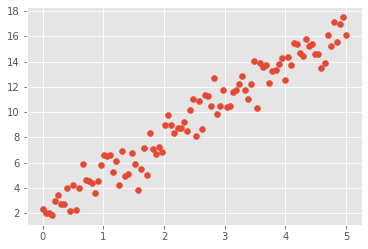

In [5]:
plt.scatter(x, y)

In [6]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
    def forward(self, x):
        output = self.linear(x)
        return output

In [7]:
model = LR()

In [8]:
x_test = torch.tensor([[1.0], [2.0]])

In [9]:
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward0>)

In [10]:
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [11]:
x2.size()

torch.Size([100, 1])

In [12]:
y_pred = model(x2)

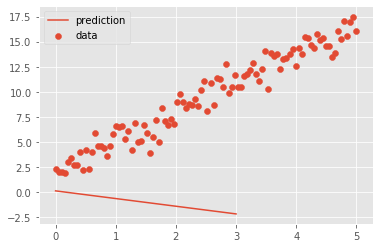

In [13]:
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [14]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [15]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 156.7843017578125
epoch: 10, loss: 108.7425765991211
epoch: 20, loss: 75.52831268310547
epoch: 30, loss: 52.56508255004883
epoch: 40, loss: 36.68894958496094
epoch: 50, loss: 25.712505340576172
epoch: 60, loss: 18.12348175048828
epoch: 70, loss: 12.876379013061523
epoch: 80, loss: 9.248371124267578
epoch: 90, loss: 6.7397308349609375
epoch: 100, loss: 5.004981517791748
epoch: 110, loss: 3.805262565612793
epoch: 120, loss: 2.975445508956909
epoch: 130, loss: 2.4013638496398926
epoch: 140, loss: 2.0040884017944336
epoch: 150, loss: 1.7290524244308472
epoch: 160, loss: 1.5385342836380005
epoch: 170, loss: 1.4064483642578125
epoch: 180, loss: 1.3147625923156738
epoch: 190, loss: 1.2510120868682861
epoch: 200, loss: 1.206579327583313
epoch: 210, loss: 1.1755024194717407
epoch: 220, loss: 1.1536647081375122
epoch: 230, loss: 1.1382169723510742
epoch: 240, loss: 1.127191185951233
epoch: 250, loss: 1.1192245483398438
epoch: 260, loss: 1.1133769750595093
epoch: 270, loss: 1.1089

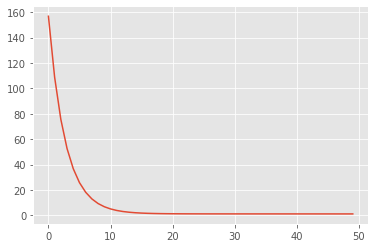

In [16]:
plt.plot(losses)

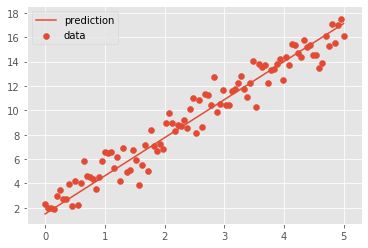

In [17]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()